In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import pickle
import matplotlib.pyplot as plt

#plt.style.use("ggplot")

In [3]:
train = pd.DataFrame.from_csv("./Data/train_bin.csv", sep='\t', encoding='utf-8')
train.head()

,SentenceId,Phrase,Sentiment,Vader,Naive,VaderOnPhrase
PhraseId,,,,,,
1,1,A series of escapades demonstrating the adage ...,1,0,0,0
2,1,A series of escapades demonstrating the adage ...,2,1,0,1
3,1,A series,2,1,0,1
4,1,A,2,1,0,1
5,1,series,2,1,0,1


In [4]:
train = train.drop(['Sentiment'], 1)
train.head()

,SentenceId,Phrase,Vader,Naive,VaderOnPhrase
PhraseId,,,,,
1,1,A series of escapades demonstrating the adage ...,0,0,0
2,1,A series of escapades demonstrating the adage ...,1,0,1
3,1,A series,1,0,1
4,1,A,1,0,1
5,1,series,1,0,1


In [6]:
train.columns = ["SentenceId","Phrase","Vader", "Sentiment", "VaderOnPhrase"]
train.head()

,SentenceId,Phrase,Vader,Sentiment,VaderOnPhrase
PhraseId,,,,,
1,1,A series of escapades demonstrating the adage ...,0,0,0
2,1,A series of escapades demonstrating the adage ...,1,0,1
3,1,A series,1,0,1
4,1,A,1,0,1
5,1,series,1,0,1


In [7]:
train.to_csv("./Data/binaray_naive.csv", sep="\t", encoding="utf-8")

In [3]:
#rm_2 = train[train.Sentiment != 2]

In [4]:
#print(len(train))
#print(len(rm_2))

156060
76478


In [5]:
#rm_2.to_csv("./Data/no2_bin.csv", sep='\t', encoding='utf-8')

In [8]:
no2 = pd.DataFrame.from_csv("./Data/no2_bin.csv", sep='\t', encoding='utf-8')
no2.head()

,SentenceId,Phrase,Sentiment,Vader,Naive,VaderOnPhrase
PhraseId,,,,,,
1,1,A series of escapades demonstrating the adage ...,1,0,0,0
22,1,good for the goose,3,1,1,1
23,1,good,3,1,1,1
34,1,"the gander , some of which occasionally amuses...",1,0,0,0
47,1,amuses,3,1,1,1


In [9]:
no2 = no2.drop("Sentiment", 1)
no2.head()

,SentenceId,Phrase,Vader,Naive,VaderOnPhrase
PhraseId,,,,,
1,1,A series of escapades demonstrating the adage ...,0,0,0
22,1,good for the goose,1,1,1
23,1,good,1,1,1
34,1,"the gander , some of which occasionally amuses...",0,0,0
47,1,amuses,1,1,1


In [10]:
no2.columns = ["SentenceId", "Phrase", "Vader", "Sentiment", "VaderOnPhrase"]
no2.head()

,SentenceId,Phrase,Vader,Sentiment,VaderOnPhrase
PhraseId,,,,,
1,1,A series of escapades demonstrating the adage ...,0,0,0
22,1,good for the goose,1,1,1
23,1,good,1,1,1
34,1,"the gander , some of which occasionally amuses...",0,0,0
47,1,amuses,1,1,1


In [11]:
no2.to_csv("./Data/binary_2removed.csv", sep='\t', encoding='utf-8')

In [8]:
with open('no2_assignment_performances.pickle', 'rb') as handle:
    no2 = pickle.load(handle)

In [9]:
with open('assignment_performances.pickle', 'rb') as handle:
    sent = pickle.load(handle)

In [10]:
naive = sent["Naive"]

In [11]:
print(naive["history"]["val_acc"])
print(no2["history"]["val_acc"])

[0.8361207227912848, 0.85143534538762078, 0.85371011149557863, 0.85508778674868635, 0.8585800333205178]
[0.86473587866108792, 0.88617939330543938, 0.89467834728033468, 0.89350156903765687, 0.90304654811715479]


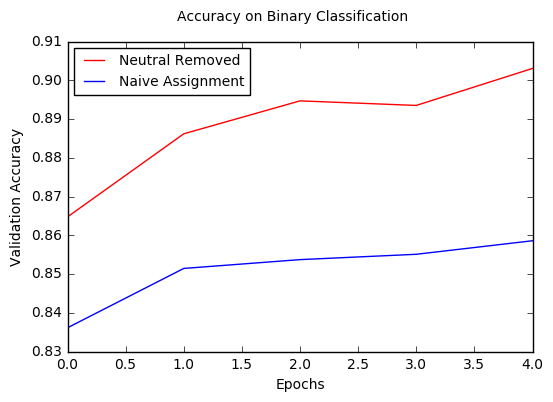

In [12]:
fig = plt.figure()
good = plt.plot(no2["history"]["val_acc"],'-r', label = 'Neutral Removed')
bad = plt.plot(naive["history"]["val_acc"],'-b', label = 'Naive Assignment')
fig.suptitle('Accuracy on Binary Classification')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend(loc=2, fontsize=10)
plt.savefig('assignment_acc.png')
plt.show()


In [13]:
train = pd.DataFrame.from_csv("./Data/train_bin.csv", sep='\t', encoding='utf-8')
train.head()

,SentenceId,Phrase,Sentiment,Vader,Naive,VaderOnPhrase
PhraseId,,,,,,
1,1,A series of escapades demonstrating the adage ...,1,0,0,0
2,1,A series of escapades demonstrating the adage ...,2,1,0,1
3,1,A series,2,1,0,1
4,1,A,2,1,0,1
5,1,series,2,1,0,1


In [19]:
len(no2[no2["Naive"]==0])/len(no2)

0.4490833965323361